In [15]:
import scipy.io
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [16]:
folder = 'D:\\Data analysis\\Mitography\\AA-PEX\\all_pex-start_omp_results-exp12'
files = os.listdir(folder)
files = [file for file in files if file.endswith('.mat')]
files

['omp_e1_aa_c1.mat',
 'omp_e1_aa_c2.mat',
 'omp_e1_aa_c3.mat',
 'omp_e1_aa_c4.mat',
 'omp_e1_aa_c5.mat',
 'omp_e1_ct_c1.mat',
 'omp_e1_ct_c2.mat',
 'omp_e2_ct_c1.mat',
 'omp_e2_ct_c2.mat',
 'omp_e2_ct_c3.mat',
 'omp_e2_ct_c4.mat']

In [6]:
exp_all = []
ctaa_all = []
cell_all = []
area_all = []
length_all = []
width_all = []
ar_all = []
ompparam_all = []

colnames = ['exp', 'ctaa', 'cell', 'area', 'length', 'width', 'ar', 'ompparam']
# put all pex in one dataframe
data_df_all = pd.DataFrame(columns=colnames)

filenums = range(len(files))
for filenum in filenums:
    data = scipy.io.loadmat(os.path.join(folder,files[filenum]),simplify_cells=True)
    area = data['area']
    length = data['length']
    width = data['width']
    ar = data['ar']
    ompparam = data['ompparam']
    exp = np.repeat(data['exp'], len(area))
    ctaa = np.repeat(data['ctaa'], len(area))
    cell = np.repeat(filenum+1, len(area))
    exp_all.append(exp)
    ctaa_all.append(ctaa)
    area_all.append(area)
    length_all.append(length)
    width_all.append(width)
    ar_all.append(ar)
    ompparam_all.append(ompparam)
    
    # create dataframe for cell with all info per pexs
    data_df = pd.DataFrame(np.vstack((exp, ctaa, cell, area, length, width, ar, ompparam)).T, 
                           columns=colnames)
    # concat pex to all pex dataframe
    data_df_all = pd.concat([data_df_all,data_df])
# change datatypes from str to numeric (float or int) for all numeric data columns in dataframe for all pexs
data_df_all['area'] = pd.to_numeric(data_df_all['area'], downcast="float")
data_df_all['length'] = pd.to_numeric(data_df_all['length'], downcast="float")
data_df_all['width'] = pd.to_numeric(data_df_all['width'], downcast="float")
data_df_all['ar'] = pd.to_numeric(data_df_all['ar'], downcast="float")
data_df_all['ompparam'] = pd.to_numeric(data_df_all['ompparam'])
data_df_all['cell'] = pd.to_numeric(data_df_all['cell'])
# change 'control' experiment label to 'ct', if there are any, to be uniform
data_df_all = data_df_all.replace('control','ct')

In [7]:
#### all
pex_all = data_df_all
savename = 'pex_all_exp12.csv'
pex_all.to_csv(os.path.join(folder,savename), index=False)

#### ct
# all detected pexs
ct_pex_all = data_df_all[(data_df_all['ctaa'] == 'ct') | (data_df_all['ctaa'] == 'control')]
savename = 'ct_pex_all_exp12.csv'
ct_pex_all.to_csv(os.path.join(folder,savename), index=False)

# all omp+ pexs
ct_pex_all_ompp = ct_pex_all[ct_pex_all['ompparam'] == 1]
savename = 'ct_pex_all_ompp_exp12.csv'
ct_pex_all_ompp.to_csv(os.path.join(folder,savename), index=False)
# all omp- pexs
ct_pex_all_ompn = ct_pex_all[ct_pex_all['ompparam'] == 0]
savename = 'ct_pex_all_ompn_exp12.csv'
ct_pex_all_ompn.to_csv(os.path.join(folder,savename), index=False)

#### aa
# all detected pexs
aa_pex_all = data_df_all[data_df_all['ctaa'] == 'aa']
savename = 'aa_pex_all_exp12.csv'
aa_pex_all.to_csv(os.path.join(folder,savename), index=False)

# all omp+ pexs
aa_pex_all_ompp = aa_pex_all[aa_pex_all['ompparam'] == 1]
savename = 'aa_pex_all_ompp_exp12.csv'
aa_pex_all_ompp.to_csv(os.path.join(folder,savename), index=False)
# all omp- pexs
aa_pex_all_ompn = aa_pex_all[aa_pex_all['ompparam'] == 0]
savename = 'aa_pex_all_ompn_exp12.csv'
aa_pex_all_ompn.to_csv(os.path.join(folder,savename), index=False)

In [8]:
data_df_all

,exp,ctaa,cell,area,length,width,ar,ompparam
0,1,aa,1,0.024,0.194,0.160,0.824742,1
1,1,aa,1,0.053,0.443,0.153,0.345372,1
2,1,aa,1,0.081,0.553,0.188,0.339964,1
3,1,aa,1,0.059,0.377,0.199,0.527851,1
4,1,aa,1,0.072,0.384,0.237,0.617188,0
...,...,...,...,...,...,...,...,...
84,2,ct,11,0.087,0.468,0.237,0.506410,1
85,2,ct,11,0.006,0.085,0.085,1.000000,1
86,2,ct,11,0.008,0.113,0.085,0.752212,0
87,2,ct,11,0.010,0.113,0.113,1.000000,0


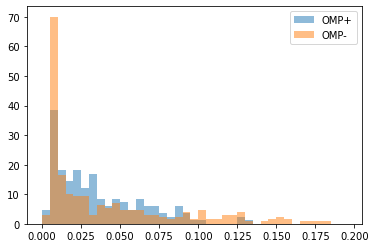

Control, OMP+ ratio
0.3878504672897196


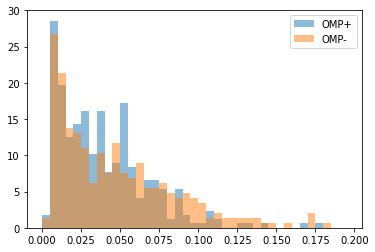

AA, OMP+ ratio
0.5338582677165354


In [14]:
bins = 10**(np.arange(-2.5, -1, 0.1, dtype='float'))
bins = np.arange(0, 0.2, 0.005)

ompp_data = ct_pex_all_ompp[ct_pex_all_ompp['exp']!='0']['area']
ompn_data = ct_pex_all_ompn[ct_pex_all_ompn['exp']!='0']['area']

plt.hist(ompp_data,bins=bins,alpha=0.5,label='OMP+',density=True)
plt.hist(ompn_data,bins=bins,alpha=0.5,label='OMP-',density=True)
plt.legend()
plt.show()

print('Control, OMP+ ratio')
print(len(ompp_data)/(len(ompp_data)+len(ompn_data)))

ompp_data = aa_pex_all_ompp[aa_pex_all_ompp['exp']!='0']['area']
ompn_data = aa_pex_all_ompn[aa_pex_all_ompn['exp']!='0']['area']

plt.hist(ompp_data,bins=bins,alpha=0.5,label='OMP+',density=True)
plt.hist(ompn_data,bins=bins,alpha=0.5,label='OMP-',density=True)
plt.legend()
plt.show()

print('AA, OMP+ ratio')
print(len(ompp_data)/(len(ompp_data)+len(ompn_data)))